# MQF 625 GROUP 14 PROJECT

## 1. Introduction

### I. Background & Problem statement

Credit card is one of the major consumer lending product in the market. When a credit card is defaulted, bank can use the opportunity to sell loan, If bank recognize that they are not able sell it, they will write if off and result in significant finance losses to the bank. Predicting accurately which customers are most likely to default represents significant business opportunity for all banks, at the same time it helps banks set up their proactive default prevention guideline to improve their bottom line.

This project focuses on Taiwan borrowers who constitute a portion of the Taiwan loan market. Our goal is to build a suitable model to predict whether a customer will default on credit card payment(Y) based on variables such as personal information and historical payment status (X).

### II. Data description

Our dataset consists of 30000 borrowers, who held at least one loan that entered repayment between April to September 2005. The borrower’s personal information is provided in the form of 5 categorial attributes and 12 billing and payment history. 

Click [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) for the source of the data from `UCI machine learning repository ` [1]

### III. Design & Findings

We started with some data cleaning and wrangling to better visualize our data and prepare it for model training. Through frequency plots and histograms, we observed that many of our price data are heavily right skewed and therefore applied a log function to balance out the distribution. We further observed that the dataset also has more females than males. The age is also mostly younger than compared to the elderly. This can provide some explanation as to why the credit limit is right skewed, since the younger generation tends to have lower credits limits. Across the past 6 months, there are also more delayed payments as compared to no delay.

We then carried our exploratory data analysis to identify features that were highly correlated with our target class, and therefore able to select the useful features. From the heat map, it seems that pay status 1-6 can be can potentially be useful predictors of default status. Borrowers that defaulted in October, tends to also delay in the past 6 months. From data analysis, elderly defaulted more than the young. Male defaulted more than the females. Higher education defaulted lesser than the lower education borrowers. First month’s delay often leads to delay in the subsequent months. Features that we found to have high predictive value for Default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We also observed that our dataset was highly imbalanced; only ~22% of the target variable belonged to the “default” class. We therefore explored several methods such as upsampling of the minority class, downsampling of the majority class and synthetic construction of data by the SMOTE algorithm. 

We then proceeded to build a classification model. We chose to try both logistic regression and SVM which are known for their effectiveness in classification problems. The logistic regression and SVM achieved accuracy of 73% and 75% on the test set respectively. More time and further extensive model experiments are required to fine tune the models to gain higher accuracy.
For the purpose of this project, we will start with data cleaning and wragling, follow by exploritary data analysis to understand the potential relationship between variables. In the end, we will perform logistic regression and kernal SVM [2] to explore the non-linearity of our model for the prediction of our target variable

## Codes

In [1]:
from IPython.display import Image

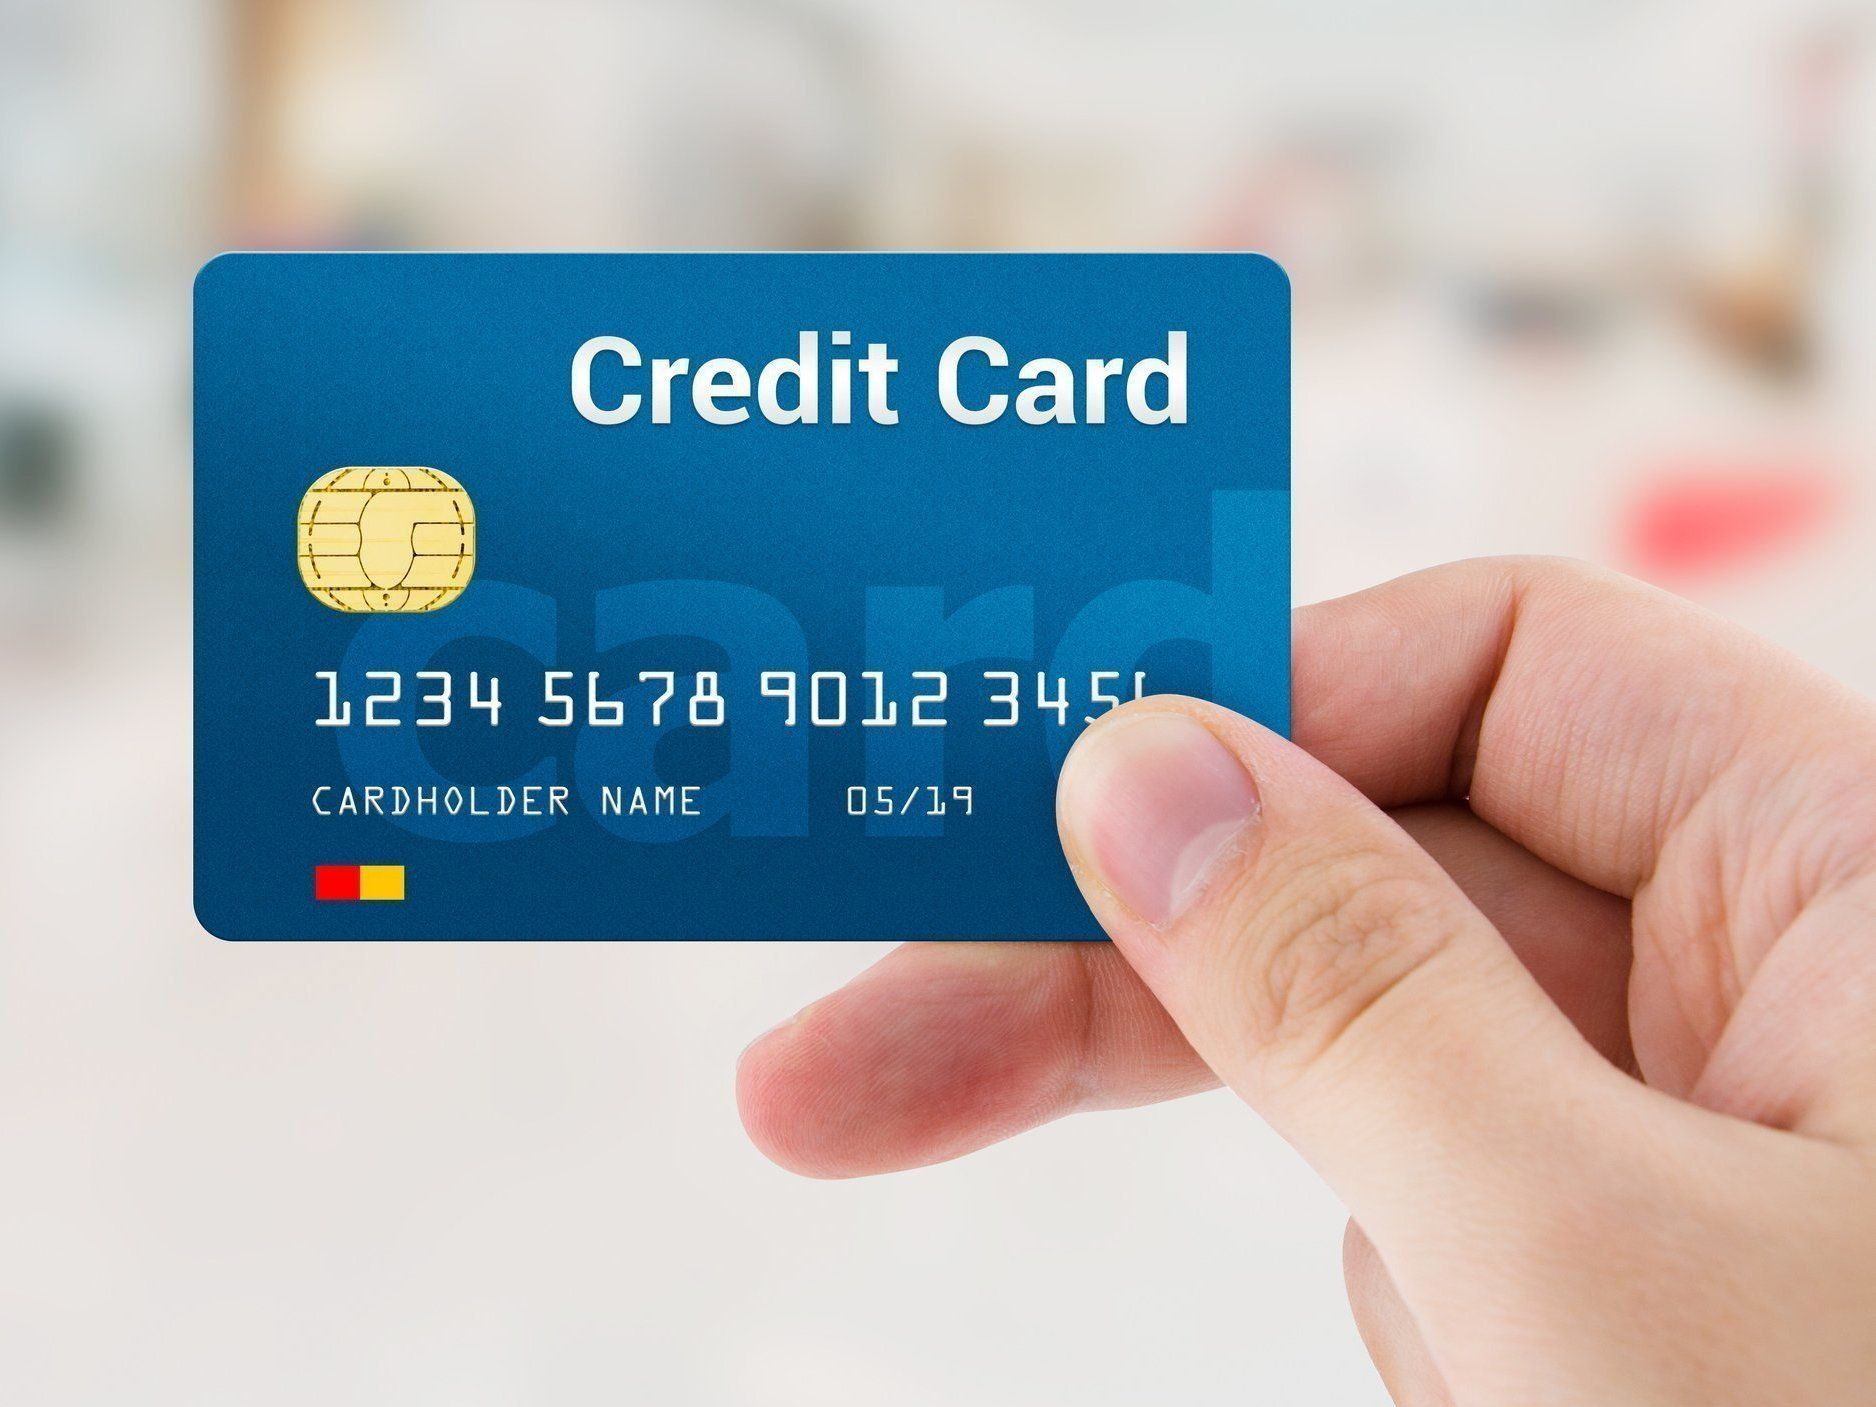

In [2]:
Image("https://imgk.timesnownews.com/story/1569653930-Credit_Card.jpg")

#### Import library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

#### Import data

In [4]:
data = pd.read_excel("default of credit card clients.xls")

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## 2. DATA WRANGLING

#### Adjusting rows and columns

In [6]:
# Make the first row become the header
# Using "ID" as index
headers = data.iloc[0]
data  = pd.DataFrame(data.values[1:], columns=headers)
data.set_index('ID',inplace=True)

In [7]:
# Adjust column names
data.rename(columns = {"SEX":"GENDER","MARRIAGE":'MARITAL_STATUS', 'PAY_0' : 'PAY_1', "LIMIT_BAL" : "CREDIT_LIMIT", "default payment next month" : "DEFAULT_STATUS"}, inplace = True)

#### Check variables

In [8]:
print("For Data Description and Explaination of Variables, please refer to `APPENDIX`")
print()
data.info()

For Data Description and Explaination of Variables, please refer to `APPENDIX`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CREDIT_LIMIT    30000 non-null  object
 1   GENDER          30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARITAL_STATUS  30000 non-null  object
 4   AGE             30000 non-null  object
 5   PAY_1           30000 non-null  object
 6   PAY_2           30000 non-null  object
 7   PAY_3           30000 non-null  object
 8   PAY_4           30000 non-null  object
 9   PAY_5           30000 non-null  object
 10  PAY_6           30000 non-null  object
 11  BILL_AMT1       30000 non-null  object
 12  BILL_AMT2       30000 non-null  object
 13  BILL_AMT3       30000 non-null  object
 14  BILL_AMT4       30000 non-null  object
 15  BILL_AMT5       30000 non-null  object
 16  BILL_AMT6     

In [9]:
# convert all data to numerical info.
data = data.apply(pd.to_numeric)

In [10]:
# creat a copy, in case we need variables in the format of number for analysis
data_original=data.copy()

In [11]:
data.describe()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Gerenal Description of the Data Set

>- The data set has 30,000 samples
>- Average Credit Limit is 167,484
>- Majority of the samples are female, average age is 35 years old
>- The average defaul rate is 22.1%

We noticed that some categorical variables do not match data description, for example:
>- `Education` has maximum value of 6 which is not in the data description 
>- `Matrital Status` has minimum value of 0 which is not in the data description 

So let's take a look at the unique values of categorical variables

##### a. Gender

In [12]:
data.GENDER.unique()

array([2, 1], dtype=int64)

>According to appendix, we can got the following categories:
>
>1. Male
>2. Female


In [13]:
data["GENDER"]=data["GENDER"].apply(lambda x: "Male" if x==1 else "Female")

##### b. Education

In [14]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

>let's combine 0,4,5 and 6 to `"others"` catergory and we can got the following categories:
>
>1. Graduate School
>2. University
>3. High School
>4. Others


In [15]:
data["EDUCATION"] = data["EDUCATION"].apply(lambda x: "Graduate School" if x==1 else ("Univeristy" if x==2 else ("High School" if x==3 else "Others")))

##### c. Marital Status

In [16]:
data.MARITAL_STATUS.unique()

array([1, 2, 3, 0], dtype=int64)

>let's combine 0 and 3 to `"others"` catergory and we can get the following categories
>
>1. Married
>2. Single
>3. Others

In [17]:
data["MARITAL_STATUS"] = data["MARITAL_STATUS"].apply(lambda x: "Married" if x==1 else ("Single" if x==2 else "Others"))

##### d. Historical payment status

In [18]:
data.PAY_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

>Let's combine the unique values to following categories:
>
>1. No delay
>2. Delay


In [19]:
for i in data.iloc[:,5:11]:
    data[i] = data[i].apply(lambda x: "No Delay" if x<0 else "Delay")

## 3.EDA

### Univariate Analysis

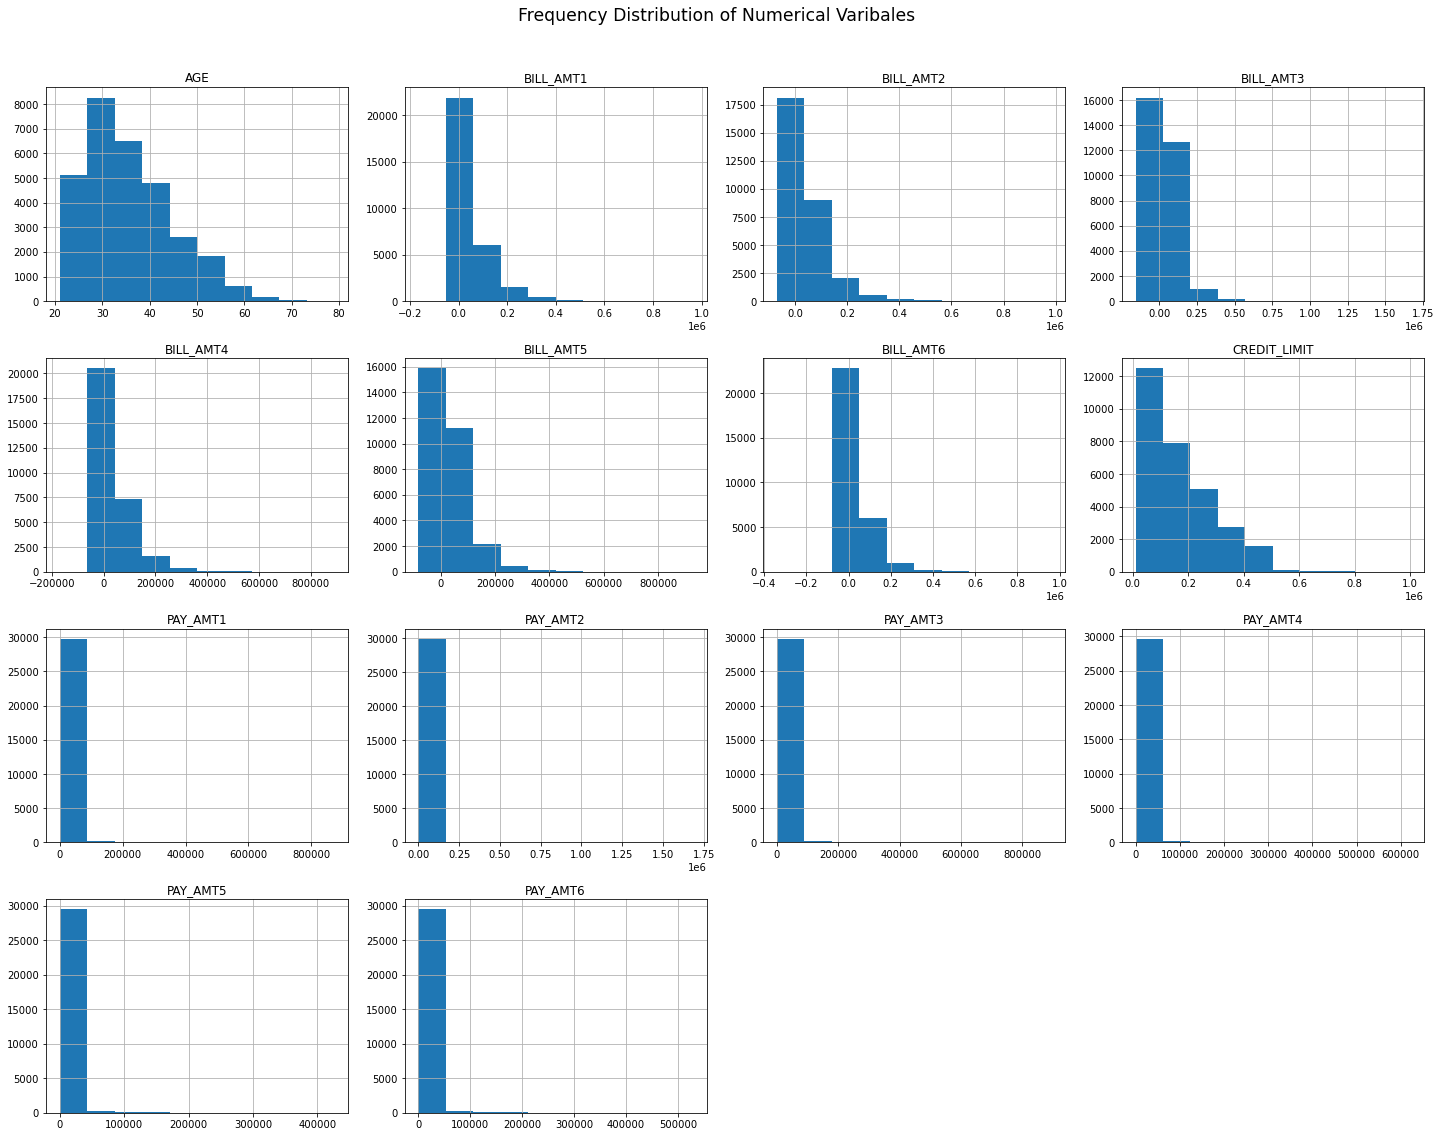

In [20]:
#Generating Frequency Distribution histograms of Numerical Variables

hist_num = data.iloc[:,:-1].hist(figsize=(20,15))
plt.suptitle('Frequency Distribution of Numerical Varibales', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.tight_layout()

>`Interpretation`
>- Some variables have strongly right-skewed distribution(eg: Credit Limit, Pay_amt)

#### Let's try using log to make them more close to bell the curve by apply log function

In [21]:
# Log the Credit Limit in new column
data["Log_limit"] = np.log(data.CREDIT_LIMIT)

In [22]:
# Log the Payment Amounts in new columns
index=1
for i in data.iloc[:,-8:-2]:
    log_pay_amt="Log_pay_amt"+str(index)
    data[log_pay_amt] = np.log(data[i]+1)
    index=index+1

In [23]:
data_log_transformed = data_original.copy()
data_log_transformed["CREDIT_LIMIT"] = data["Log_limit"]

In [24]:
# New data_log_transformed dataframe 

data_log_transformed = data_original.copy()
data_log_transformed["CREDIT_LIMIT"] = data["Log_limit"]
# Log the Payment Amounts in new columns
index=1
for i in data_log_transformed.iloc[:,-7:-1]:
    log_pay_amt="Log_pay_amt"+str(index)
    data_log_transformed[log_pay_amt] = np.log(data_log_transformed[i]+1)
    index=index+1

In [25]:
# Log the Bill Amounts in new columns
index=1
for i in data_log_transformed[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]:
    log_pay_amt="Log_bill_amt"+str(index)
    data_log_transformed[log_pay_amt] = data_log_transformed[i].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    index += 1

In [26]:
data_log_transformed = data_log_transformed.drop(
    columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'CREDIT_LIMIT'])

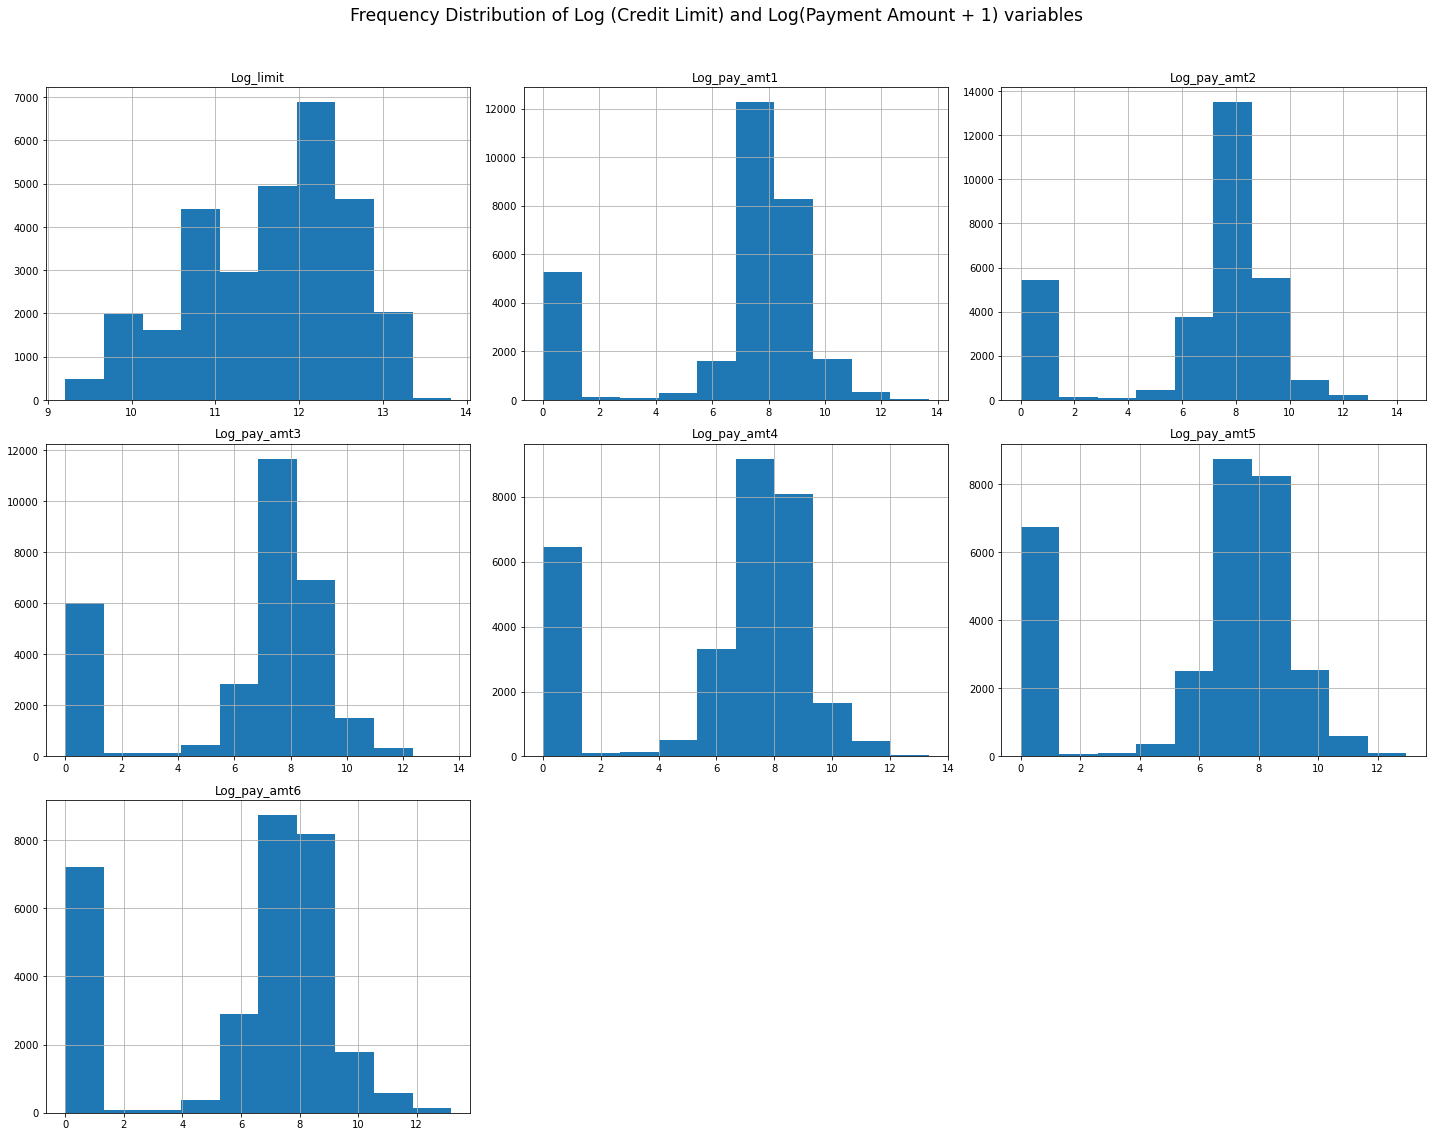

In [27]:
#Check the result of logged distribution of Credit Limit and Payment Amount
hist_num = data.iloc[:,-7:].hist(figsize=(20,15))
plt.suptitle("Frequency Distribution of Log (Credit Limit) and Log(Payment Amount + 1) variables", x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.tight_layout()

> `Observation:` 
>
> Logged PAY_AMT graph is more curved than the original graph
>
> Other than "zero payments", the remaining data tends to be normally distributed

#### Generate Frequency Distribution Histogram of Categorical Variables

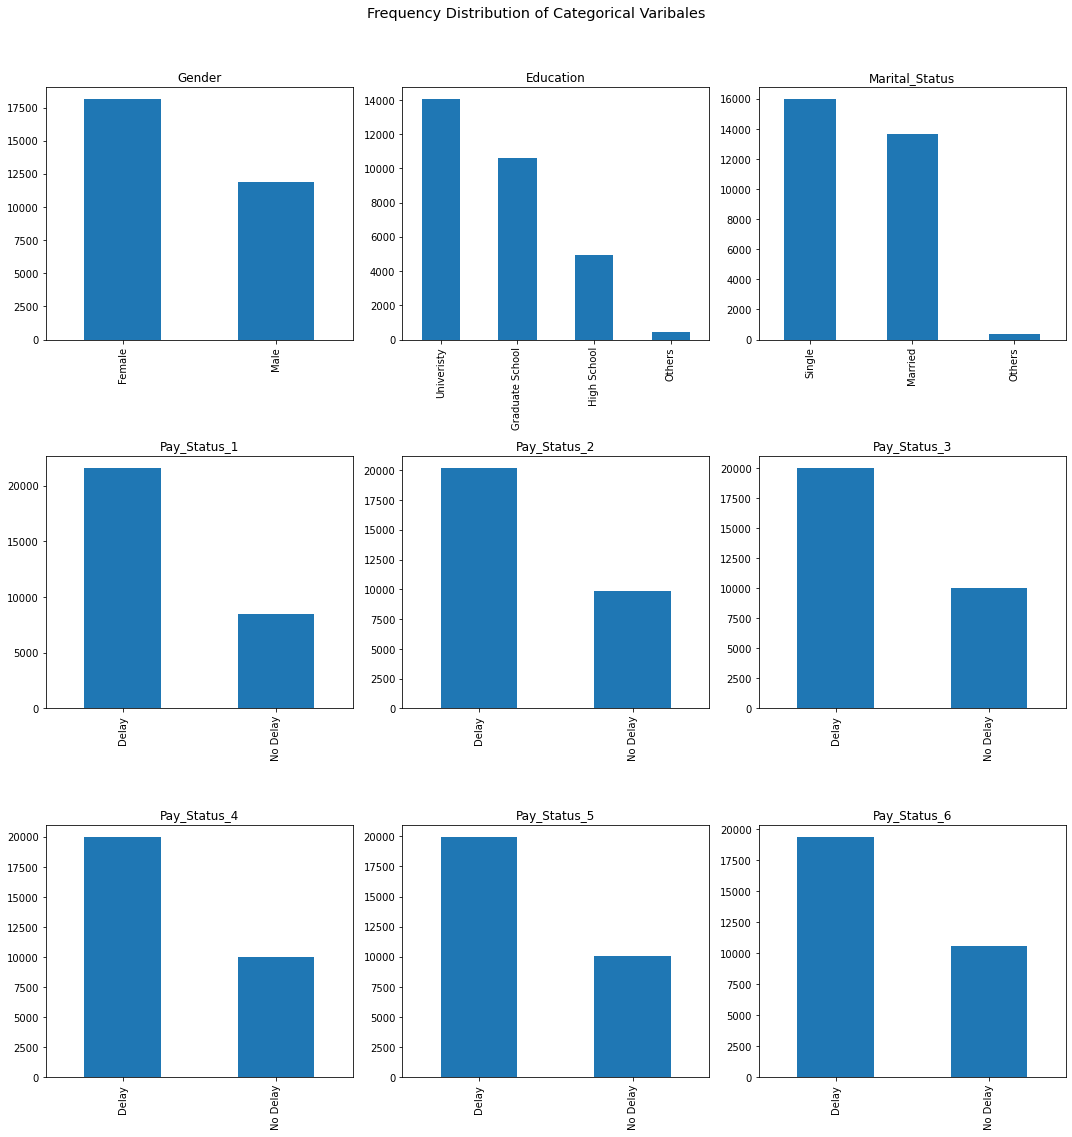

In [28]:
fig, axes = plt.subplots(figsize=(15,15),nrows=3, ncols=3)
plt.suptitle('Frequency Distribution of Categorical Varibales', x=0.5, y=1.05, ha='center', fontsize='x-large')
data['GENDER'].value_counts().plot.bar(ax=axes[0,0],title="Gender")
data['EDUCATION'].value_counts().plot.bar(ax=axes[0,1],title="Education")
data['MARITAL_STATUS'].value_counts().plot.bar(ax=axes[0,2],title="Marital_Status")
i_row=1
i_col=0
count=1
for i in data.iloc[:,5:11]:
    data[i].value_counts().plot.bar(ax=axes[i_row,i_col],title="Pay_Status_"+str(count))
    count=count+1
    i_col=i_col+1
    if count>=4:
        i_row=2
    if count==4:
        i_col=0
# set title and axis labels
plt.tight_layout()
plt.show()


#### Generate Frequency Distribution Histogram of Target Value

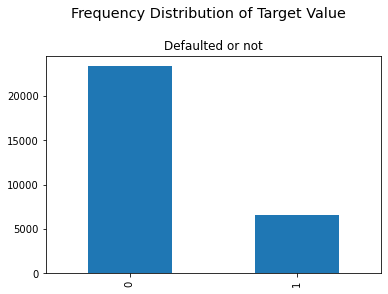

In [29]:
plt.suptitle('Frequency Distribution of Target Value', x=0.5, y=1.05, ha='center', fontsize='x-large')
data['DEFAULT_STATUS'].value_counts().plot.bar(title="Defaulted or not")

In [30]:
ave_defalt_rate = round(np.mean(data["DEFAULT_STATUS"]),3)*100
print("The average default rate of the dataset is " + str(ave_defalt_rate) +"%")

The average default rate of the dataset is 22.1%


### Multivariate Analysis

#### Correlation Matrix

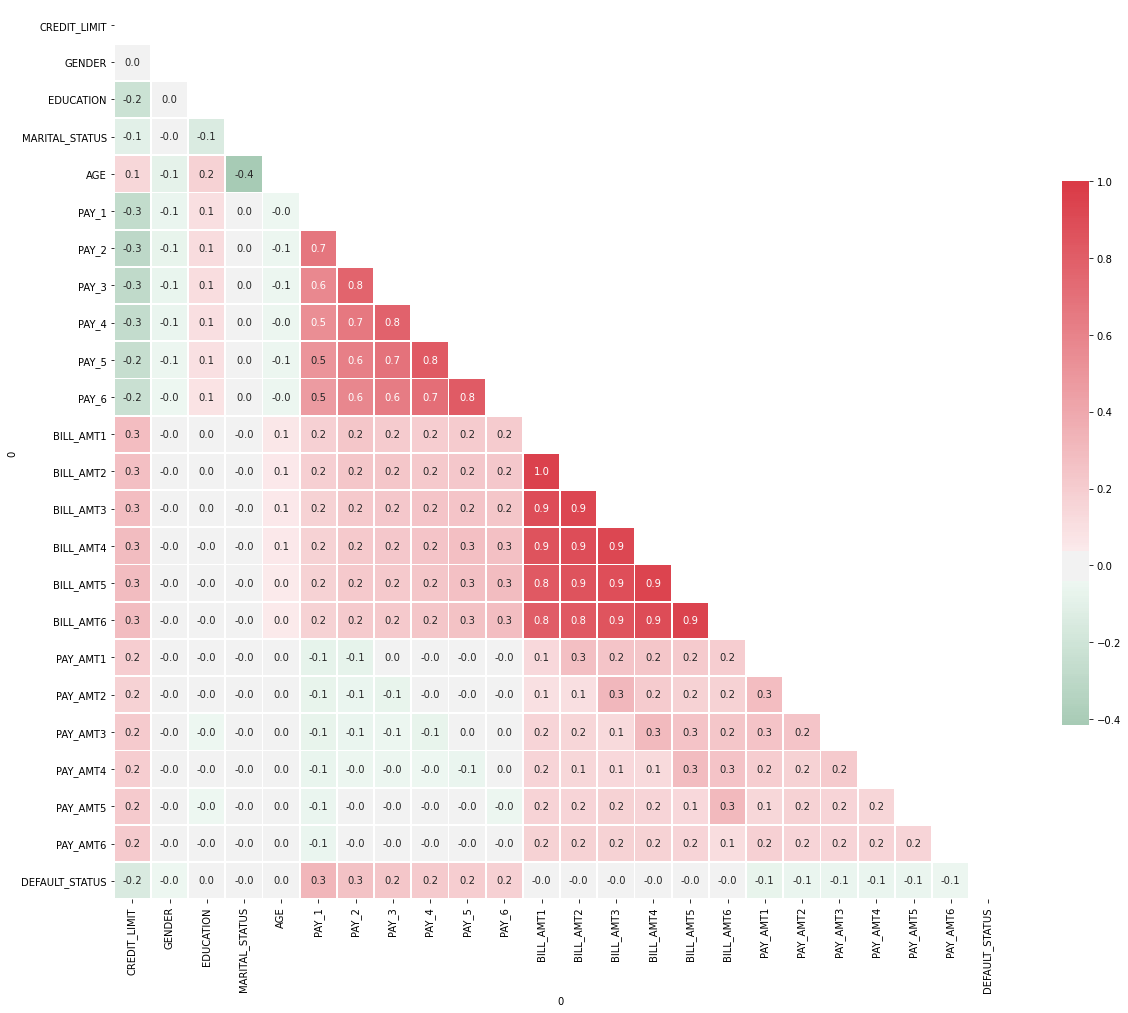

In [31]:
f, ax = plt.subplots(figsize = (20, 20))   
# this is to set fig size

correlational_matrix = data_original.corr()
#calculate correlation matrix and assign it

mask = np.triu(np.ones_like(correlational_matrix, dtype = np.bool))


cmap = sns.diverging_palette(500, 10, as_cmap = True) 
# this is just to set color range

# Range of correlational coefficients: -1 through 1

sns.heatmap(correlational_matrix,        
            mask = mask,
            cmap = cmap,                 #set color range
            vmax = 1,                    #affects the color range
            center = 0,                  #affects the color range
            square = True,               
            annot= True,                 #add annotation
            fmt=".1f",                   #set decimal place
            linewidths = 1,              #set line width
            cbar_kws = {"shrink": 0.5})  #shrink color bar by 0.5 times

>`Interpretation`
>- There is a positive correlation between `Default Status` and `PAY_1 to PAY_6`. However, the correlation is still >considered low, because it is only between 0.2 and 0.3
>
>- There is a negative correlation between `Default Status` and `Credit Limit`, However, the -0.2 correlation is considered as low.
>
>- There is a strong relationship for variables within the same category, such as "Bill_AMT", "Payment History"

Since our dependent variable "DEFAULT_STATUS" is categorical, we can split the distributions by "default/not-default" to look at the characteristics of the default/not-default groups in relation to our independent variables. We want to see how differentiated our target variable is against each individual independent variable  

In [32]:
data_log_transformed.head()

,GENDER,EDUCATION,MARITAL_STATUS,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,Log_pay_amt3,Log_pay_amt4,Log_pay_amt5,Log_pay_amt6,Log_bill_amt1,Log_bill_amt2,Log_bill_amt3,Log_bill_amt4,Log_bill_amt5,Log_bill_amt6
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,24,2,2,-1,-1,-2,-2,...,0.000000,0.000000,0.000000,0.000000,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000
2,2,2,2,26,-1,2,0,0,0,2,...,6.908755,6.908755,0.000000,7.601402,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096
3,2,2,2,34,0,0,0,0,0,0,...,6.908755,6.908755,6.908755,8.517393,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816
4,2,2,1,37,0,0,0,0,0,0,...,7.090910,7.003974,6.975414,6.908755,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771
5,1,2,1,57,-1,0,-1,0,0,0,...,9.210440,9.105091,6.536692,6.522093,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118


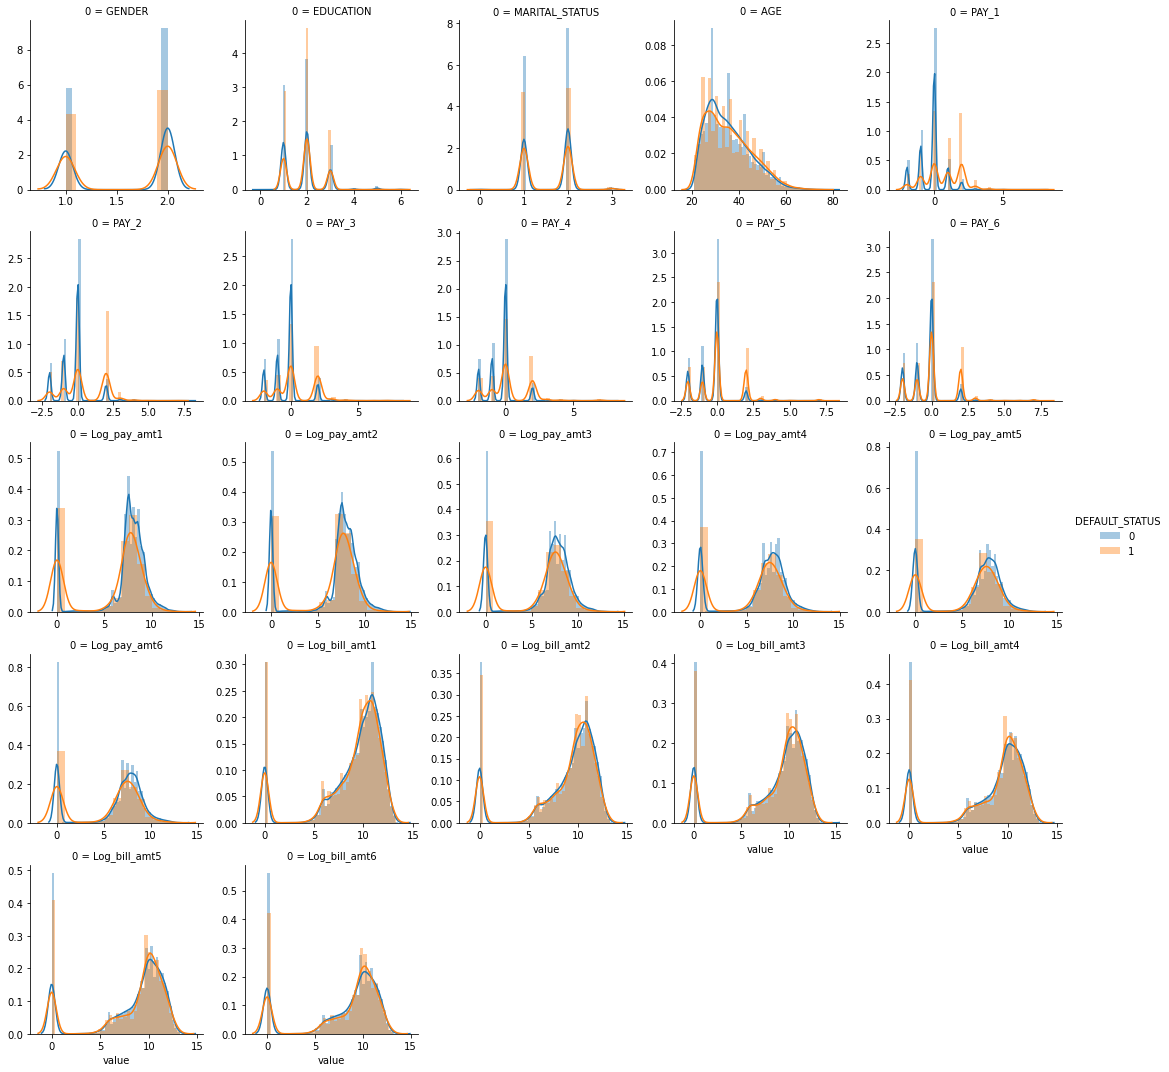

In [33]:
output = "DEFAULT_STATUS"

cols = [ f for f in data_log_transformed.columns if data_log_transformed.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt(data_log_transformed, 
            id_vars = output, 
            value_vars = cols)
g = sns.FacetGrid(f, hue=output, col=0, col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

`Interpretation`
>- Defaults have a higher proportion of lower CREDIT_LIMIT values
>- NonDefaults have a higher proportion of Females (Sex=2)
>- NonDefaults have a higher proportion of Singles (MARRIAGE=2)
>- NonDefaults have a higher proportion of people 30-40years. Seen from the gap in blue and orange line
>- NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!
>- We can see that the log_pay and log_bill amounts can be important indicator as more non-defaults are on the higher end of the pay_amt scale(they pay up more)  and at the lower end of bill_amt(they have less carried over bill)

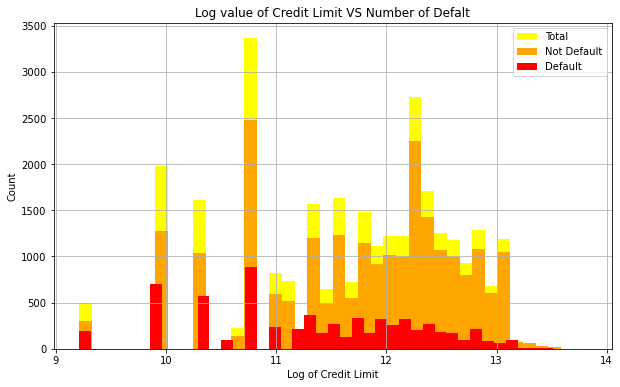

In [34]:
# Visualization of Credit Limite and Default Count using histogram
fig, ax = plt.subplots(figsize = (10, 6))
plt.hist(data.Log_limit, bins = 40, alpha = 1, color = "yellow", label="Total")
plt.hist(data.query('DEFAULT_STATUS == 0').Log_limit, bins = 40, alpha = 1, color = "orange", label = "Not Default")
plt.hist(data.query('DEFAULT_STATUS == 1').Log_limit, bins = 40, alpha = 1, color = "red", label = "Default")
plt.xlabel("Log of Credit Limit")
plt.ylabel("Count")
plt.title("Log value of Credit Limit VS Number of Defalt")
plt.grid()
plt.legend()
plt.show()

>`Interpretation`
>
>Cards with lower Logged `Credit Limit` (below 11) tend to have higher defaults.

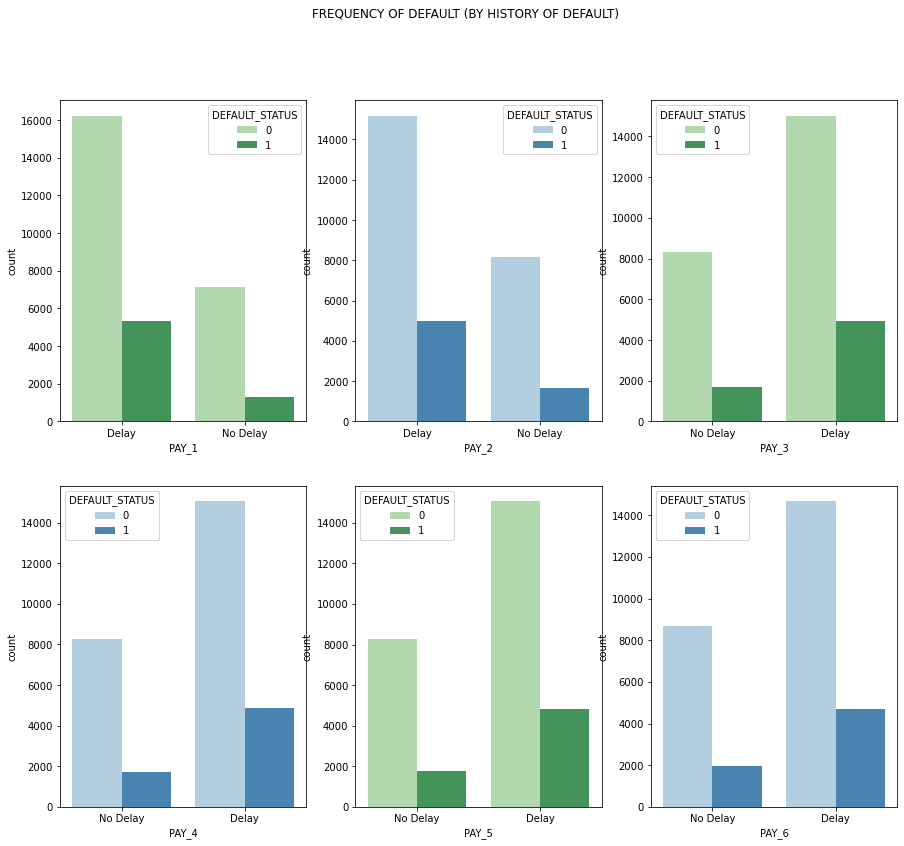

In [35]:
subset = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'DEFAULT_STATUS']]

f, axes = plt.subplots(2, 3, figsize=(15, 13), facecolor='white')
f.suptitle('FREQUENCY OF DEFAULT (BY HISTORY OF DEFAULT)')

ax1 = sns.countplot(x="PAY_1", hue="DEFAULT_STATUS", data=subset, palette="Greens", ax=axes[0,0])
ax2 = sns.countplot(x="PAY_2", hue="DEFAULT_STATUS", data=subset, palette="Blues", ax=axes[0,1])
ax3 = sns.countplot(x="PAY_3", hue="DEFAULT_STATUS", data=subset, palette="Greens", ax=axes[0,2])
ax4 = sns.countplot(x="PAY_4", hue="DEFAULT_STATUS", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_5", hue="DEFAULT_STATUS", data=subset, palette="Greens", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_6", hue="DEFAULT_STATUS", data=subset, palette="Blues", ax=axes[1,2]);

>`Interpretation`
>
>Customer default in Oct(Target Value) has more history of delaying payment in the past 6 months.

Histogram by Age


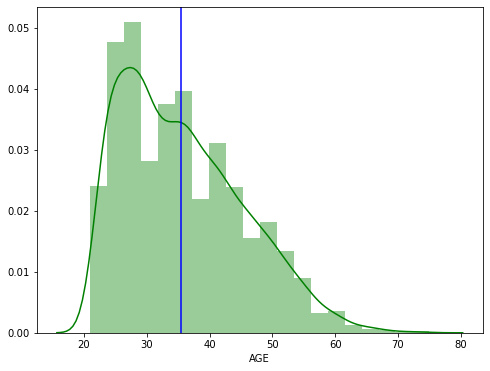

In [36]:
print("Histogram by Age")

plt.figure(figsize = (8 , 6))
sns.distplot(data.query('DEFAULT_STATUS == 1').AGE, bins = 20, color="green")
mean_age = data.AGE.mean()
plt.axvline(mean_age,0,1, color = "blue")

>`Interpretation:`
>   
>- Majority of the credit card holders are between 20 to 30 years old

#### Let's categorize the age into following age groups
* age < 40 `young`
* age >=40 and age < 60 `middle`
* greater than 60 `old`

In [37]:
#define a function to categorize age group

def get_group (age):
        if age < 40:
            return "Young"
        elif age >= 60:
            return "Old"
        else:
            return "Middle"

In [38]:
# apply to "AGE" and create a new column
data["Age_group"] = data["AGE"].apply(get_group)

Age Group VS Default Rate


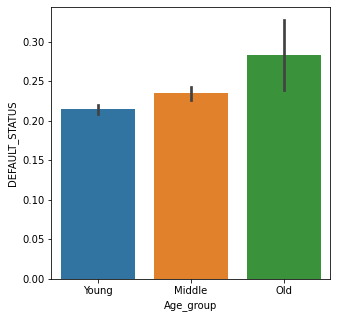

In [39]:
print("Age Group VS Default Rate")

plt.figure(figsize = (5 , 5))
sns.barplot(x = 'Age_group', y = "DEFAULT_STATUS", data = data)
plt.show()

>`Interpretation:`
>   
>- Higher age group has higher default rate

> Default Rate Ranking by `Age Group`:
> 
> `Old Age` > `Middle Age` > `Young Age`

In [40]:
# Define a function to plot barplot between categorical variable and default status
def plot_cat(categorical_variable):
    sns.barplot(x = categorical_variable, y="DEFAULT_STATUS", data=data)
    plt.figure(figsize=(10,6))
    plt.show()

Default Rate VS Gender


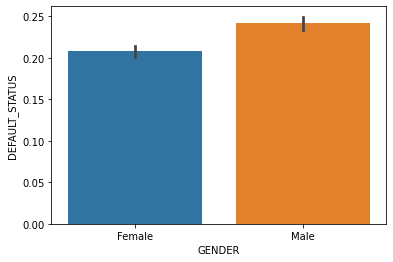

<Figure size 720x432 with 0 Axes>

In [41]:
print("Default Rate VS Gender")
plot_cat("GENDER")

>`Interpretation:`
   > 
>- Male has higher default rate than Female

Default Rate VS Education Background


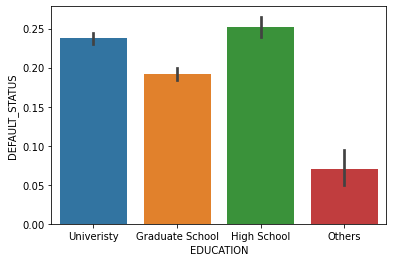

<Figure size 720x432 with 0 Axes>

In [42]:
print("Default Rate VS Education Background")
plot_cat("EDUCATION")

>`Interpretation:`
    >
>- Customer with higher education background have lower default rate

> Default Rate Ranking by `Education` Background:
> 
> `High School` > `University` > `Graduate School` > `Others`

Default Rate VS Marital Status


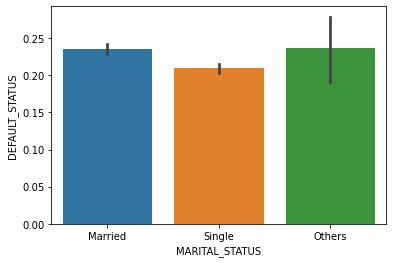

<Figure size 720x432 with 0 Axes>

In [43]:
print("Default Rate VS Marital Status")
plot_cat("MARITAL_STATUS")

>`Interpretation:`
>    
>- Customer with `Single` marital status has lower default rate
>- Customer with `Other` marital status has higher default rate

> Default Rate Ranking by `Marital Status`:
> 
> `Others` > `Marries` > `Single`

Default Rate VS History of Delaying Payment in previous month (SEP)


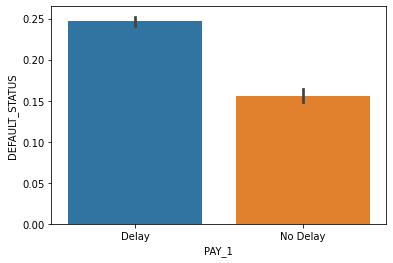

<Figure size 720x432 with 0 Axes>

In [44]:
print("Default Rate VS History of Delaying Payment in previous month (SEP)")
plot_cat("PAY_1")

>`Interpretation:`
 >   
>- Customer with delay history in Sep (`PAY_1`) has higher chance of default in Oct (`Target Value`)

Default Rate VS History of Delaying Payment in previous month(AUG)


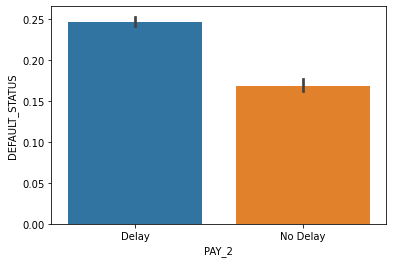

<Figure size 720x432 with 0 Axes>

In [45]:
print("Default Rate VS History of Delaying Payment in previous month(AUG)")
plot_cat("PAY_2")

>`Interpretation:`
>    
>- Customer with delay history in Aug (`PAY_2`) has higher chance of default in Oct (`Target Value`)

Grouped age and history payment status vs Default Rate


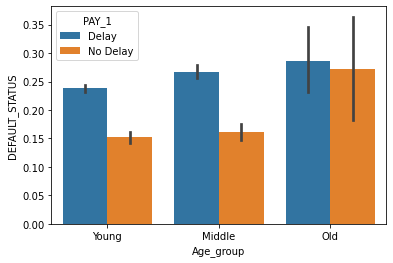

In [46]:
print("Grouped age and history payment status vs Default Rate")

sns.barplot(x = 'Age_group', y = "DEFAULT_STATUS", data = data, hue = "PAY_1")
plt.show()

>`Interpretation`
>
>Customer with history of payment delay in Sep(`PAY_1`) has higher default rate in Oct(`Target Value`)
>and this trend pattern is consistant in all age groups

Grouped age and education background vs Default Rate


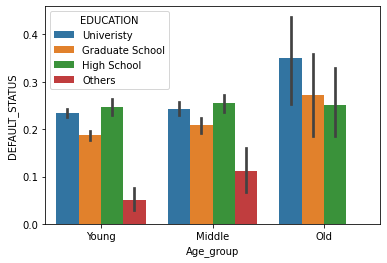

In [47]:
print("Grouped age and education background vs Default Rate")

sns.barplot(x = 'Age_group', y = "DEFAULT_STATUS", data = data, hue = "EDUCATION")
plt.show()

>`Interpretation`
>
>- the default rate of customer having `High School` Education background is very close across all age agroup
>- The default rate of customer having `University` and `Graduate School` Education background is high for `Old` Age >Group, and reletively low for `Young` and `Middle` age group

Ploting log of PAY_AMT Histogram


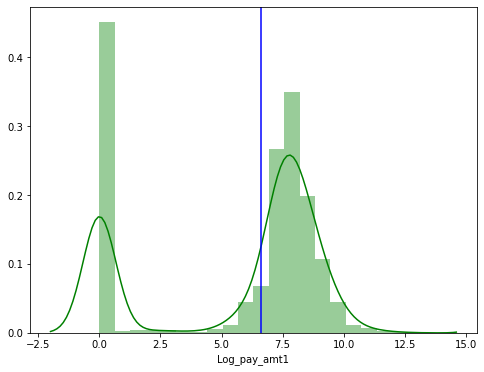

In [48]:
print("Ploting log of PAY_AMT Histogram")

plt.figure(figsize = (8 , 6))
sns.distplot(data.query('DEFAULT_STATUS == 1').Log_pay_amt1, bins = 20, color="green")
mean_amt1 = data.Log_pay_amt1.mean()
plt.axvline(mean_amt1,0,1, color = "blue")

>`Interpretation`
>
>- The peak on the left represent customer with zero payment in Sep (`PAY_AMT1`)
>- Other than zero-payment customers, the of the logged payment amount data are close to normal distribution.

#### History of Payment Amount VS Default Status
Use Function to categorize the log of payment amount in Sep (`PAY_1`) into the following groups:
* log of previous_payment_amount in September(Log_pay_amt1) < 2.5 `low`
* Log_pay_amt1 >=2.5 and Pay_amt1 < 9 `medium`
* Log_pay_amt1 >= 9 `high`

In [49]:
# Define our function 
def log_amt(x):
    if x<2.5:
        return "low"
    elif x>=2.5 and x<9:
        return "medium"
    else:
        return "high"

In [50]:
# Apply get_amt function to SEP(PAY_AMT1) and create new column
data["log_amt1_group"]=data["Log_pay_amt1"].apply(lambda x:log_amt(x))

Default Status VS Payment Amount in Sep by Group


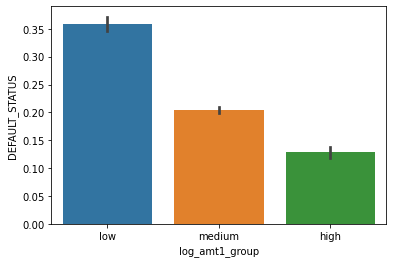

<Figure size 720x432 with 0 Axes>

In [51]:
print("Default Status VS Payment Amount in Sep by Group")
plot_cat("log_amt1_group")

>`Interpretation`
>
>- `Low` Payment Amount in `Sep` has `higher` Default Rate in Target Month
>- `High` Payment Amount in `Sep` has `lower` Default Rate in Target Month


In [52]:
# Apply get_amt function to AUG(PAY_AMT2) and create new column
data["log_amt2_group"]=data["Log_pay_amt2"].apply(lambda x:log_amt(x))

Default Status VS Payment Amount in Aug by Group


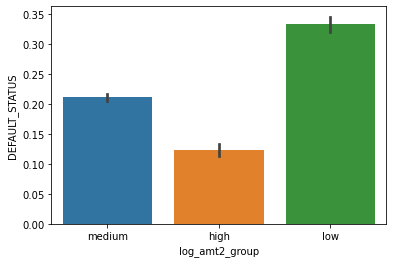

<Figure size 720x432 with 0 Axes>

In [53]:
print("Default Status VS Payment Amount in Aug by Group")
plot_cat("log_amt2_group")

>`Interpretation`
>
>- `Low` Payment Amount in `Aug` has `higher` Default Rate in Target Month
>- `High` Payment Amount in `Aug` has `lower` Default Rate in Target Month
>- This is consistant with our previous observation

In [54]:
# Apply the same formula to other months
data["log_amt3_group"]=data["Log_pay_amt3"].apply(lambda x:log_amt(x))
data["log_amt4_group"]=data["Log_pay_amt4"].apply(lambda x:log_amt(x))
data["log_amt5_group"]=data["Log_pay_amt5"].apply(lambda x:log_amt(x))
data["log_amt6_group"]=data["Log_pay_amt6"].apply(lambda x:log_amt(x))

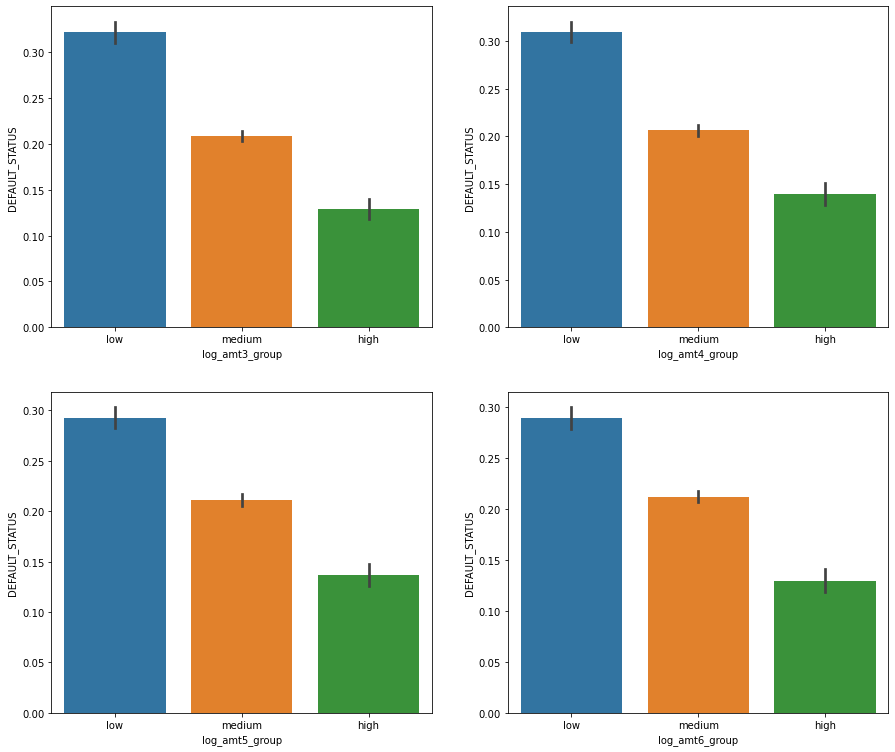

In [55]:
f, axes = plt.subplots(2, 2, figsize=(15, 13), facecolor='white')

ax1 = sns.barplot(x = "log_amt3_group", y="DEFAULT_STATUS", data=data, ax=axes[0,0])
ax2 = sns.barplot(x = "log_amt4_group", y="DEFAULT_STATUS", data=data, ax=axes[0,1])
ax3 = sns.barplot(x = "log_amt5_group", y="DEFAULT_STATUS", data=data, ax=axes[1,0])
ax4 = sns.barplot(x = "log_amt6_group", y="DEFAULT_STATUS", data=data, ax=axes[1,1])


>`Interpretation`
>
>- `Low` Payment Amount in the past tends to have higher` Default Rate in Target Month
>- `High` Payment Amount in the past tends to have lower Default Rate in Target Month
>- This pattern is consistant throught out from April to Sep Data 

## 4. Modelling

In [56]:
import sklearn
from sklearn.model_selection import train_test_split

In [57]:
import statsmodels.api as sm

In [58]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CREDIT_LIMIT    30000 non-null  int64
 1   GENDER          30000 non-null  int64
 2   EDUCATION       30000 non-null  int64
 3   MARITAL_STATUS  30000 non-null  int64
 4   AGE             30000 non-null  int64
 5   PAY_1           30000 non-null  int64
 6   PAY_2           30000 non-null  int64
 7   PAY_3           30000 non-null  int64
 8   PAY_4           30000 non-null  int64
 9   PAY_5           30000 non-null  int64
 10  PAY_6           30000 non-null  int64
 11  BILL_AMT1       30000 non-null  int64
 12  BILL_AMT2       30000 non-null  int64
 13  BILL_AMT3       30000 non-null  int64
 14  BILL_AMT4       30000 non-null  int64
 15  BILL_AMT5       30000 non-null  int64
 16  BILL_AMT6       30000 non-null  int64
 17  PAY_AMT1        30000 non-null  int64
 18  PAY_AMT2        30000 non-

> Modelling using numbers for categorical varibles

### Training logistic regression model with all independent variables

In [59]:
y = data_original['DEFAULT_STATUS']
X = data_original.drop(columns=['DEFAULT_STATUS'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
log_reg = sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.466217
         Iterations 7


In [62]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20077
Method:                           MLE   Df Model:                           22
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1210
Time:                        18:45:57   Log-Likelihood:                -9371.0
converged:                       True   LL-Null:                       -10661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CREDIT_LIMIT   -9.986e-07    1.9e-07     -5.247      0.000   -1.37e-06   -6.26e-07
GENDER            -0.1876      0.032     -5.796      0.000      -0.251      -0.124
EDUCATION         -0.1304      0.024

In [63]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20077
Method:                           MLE   Df Model:                           22
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1210
Time:                        18:45:57   Log-Likelihood:                -9371.0
converged:                       True   LL-Null:                       -10661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CREDIT_LIMIT   -9.986e-07    1.9e-07     -5.247      0.000   -1.37e-06   -6.26e-07
GENDER            -0.1876      0.032     -5.796      0.000      -0.251      -0.124
EDUCATION         -0.1304      0.024

In [64]:
yhat = log_reg.predict(X_test) 
prediction = list(map(round, yhat)) 

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))


Confusion Matrix : 
 [[7498  244]
 [1638  520]]
Test accuracy =  0.8098989898989899


### Training logistic regression model with chosen independent variables

In [65]:
X_train=X_train[["CREDIT_LIMIT", "GENDER", "EDUCATION","MARITAL_STATUS","PAY_1", "PAY_2", "PAY_3", "BILL_AMT1", "PAY_AMT1", "PAY_AMT2"]]
X_test=X_test[["CREDIT_LIMIT", "GENDER", "EDUCATION","MARITAL_STATUS","PAY_1", "PAY_2", "PAY_3", "BILL_AMT1", "PAY_AMT1", "PAY_AMT2"]]

In [66]:
log_reg1 = sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.467050
         Iterations 7


In [67]:
print(log_reg1.summary()) 

                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20090
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1195
Time:                        18:45:57   Log-Likelihood:                -9387.7
converged:                       True   LL-Null:                       -10661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CREDIT_LIMIT   -1.194e-06   1.73e-07     -6.883      0.000   -1.53e-06   -8.54e-07
GENDER            -0.1855      0.031     -6.036      0.000      -0.246      -0.125
EDUCATION         -0.1287      0.021

In [68]:
yhat = log_reg1.predict(X_test) 
prediction = list(map(round, yhat)) 

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))


Confusion Matrix : 
 [[7496  246]
 [1643  515]]
Test accuracy =  0.8091919191919192


### Implementing dummy variables for modeling with categorical variables

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CREDIT_LIMIT    30000 non-null  int64  
 1   GENDER          30000 non-null  object 
 2   EDUCATION       30000 non-null  object 
 3   MARITAL_STATUS  30000 non-null  object 
 4   AGE             30000 non-null  int64  
 5   PAY_1           30000 non-null  object 
 6   PAY_2           30000 non-null  object 
 7   PAY_3           30000 non-null  object 
 8   PAY_4           30000 non-null  object 
 9   PAY_5           30000 non-null  object 
 10  PAY_6           30000 non-null  object 
 11  BILL_AMT1       30000 non-null  int64  
 12  BILL_AMT2       30000 non-null  int64  
 13  BILL_AMT3       30000 non-null  int64  
 14  BILL_AMT4       30000 non-null  int64  
 15  BILL_AMT5       30000 non-null  int64  
 16  BILL_AMT6       30000 non-null  int64  
 17  PAY_AMT1        30000 non-null 

In [70]:
data_d=data.drop(columns=['CREDIT_LIMIT','AGE','PAY_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3',
                          'PAY_AMT4','PAY_AMT5','PAY_AMT6','Log_pay_amt1','Log_pay_amt1','Log_pay_amt2',
                          'Log_pay_amt3','Log_pay_amt4','Log_pay_amt5','Log_pay_amt6'])

In [71]:
data_d=pd.get_dummies(data_d)

In [72]:
y = data_d['DEFAULT_STATUS']
X = data_d.drop(columns=['DEFAULT_STATUS'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
log_reg2 = sm.Logit(y_train, X_train).fit() 

         Current function value: 0.483909
         Iterations: 35


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [75]:
print(log_reg2.summary()) 

                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20066
Method:                           MLE   Df Model:                           33
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                 0.08767
Time:                        18:45:57   Log-Likelihood:                -9726.6
converged:                      False   LL-Null:                       -10661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
BILL_AMT1                 -2.481e-06   9.66e-07     -2.568      0.010   -4.37e-06   -5.88e-07
BILL_AMT2                  3.026e-06   1.21e-06      2.496      0.013     6.5e-07     

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [76]:
yhat = log_reg2.predict(X_test) 
prediction = list(map(round, yhat)) 

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))


Confusion Matrix : 
 [[7589  153]
 [1979  179]]
Test accuracy =  0.7846464646464646


### Using just log CREDIT_LIMIT as independent variable


In [77]:
X_train = X_train['Log_limit']
X_test = X_test['Log_limit']

In [78]:
log_reg3 = sm.Logit(y_train, X_train).fit()
print(log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.523731
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20099
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                 0.01259
Time:                        18:45:57   Log-Likelihood:                -10527.
converged:                       True   LL-Null:                       -10661.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Log_limit     -0.1097      0.001    -74.730      0.000      -0.113      -0.107


In [79]:
yhat = log_reg3.predict(X_test) 
prediction = list(map(round, yhat)) 

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[7742    0]
 [2158    0]]
Test accuracy =  0.7820202020202021


>`Interpretation`
>
> We can see here that there is an imbalance of y target class. There is a lower proportion of defaults, ~20%, that makes the base naive model predicting all to be non-default right 78% of the time. Hence, we need to explore some data sampling methods so as to create a more robust model which is reliable with unseen data

### Sample of data using over-sampling, under-sampling and SMOTE algorithm

In [80]:
from sklearn.utils import resample

In [81]:
data.columns

Index(['CREDIT_LIMIT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS', 'Log_limit', 'Log_pay_amt1', 'Log_pay_amt2',
       'Log_pay_amt3', 'Log_pay_amt4', 'Log_pay_amt5', 'Log_pay_amt6',
       'Age_group', 'log_amt1_group', 'log_amt2_group', 'log_amt3_group',
       'log_amt4_group', 'log_amt5_group', 'log_amt6_group'],
      dtype='object', name=0)

In [82]:
data_majority = data[data.DEFAULT_STATUS==0]
data_minority = data[data.DEFAULT_STATUS==1]

print(data_majority.DEFAULT_STATUS.count())
print("-----------")
print(data_minority.DEFAULT_STATUS.count())
print("-----------")
print(data.DEFAULT_STATUS.value_counts())

23364
-----------
6636
-----------
0    23364
1     6636
Name: DEFAULT_STATUS, dtype: int64


In [83]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=23364,    # to match majority class
                                 random_state=777) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
# Display new class counts
data_upsampled.DEFAULT_STATUS.value_counts()

1    23364
0    23364
Name: DEFAULT_STATUS, dtype: int64

In [84]:
# Downsample majority class
data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6636,     # to match minority class
                                 random_state=777) # reproducible results

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])
# Display new class counts
data_downsampled.DEFAULT_STATUS.value_counts()

1    6636
0    6636
Name: DEFAULT_STATUS, dtype: int64

### Pros and Cons of Up/down Sampling 

Upsampling of minority class (DEFAULT_STATUS=1) has the risk of overfitting the model since it increases the counts/occurance of minority class. Thus it is expected to perform better than downsampling[3] 

Downsampling can discard potentially useful information and the sample can be biased, but it helps improving the run time

A third method is to create a syntetic sample by using the [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) (Synthetic Minority Oversampling TEchnique)[4] algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. 

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [1]:
## remember to pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [86]:
y = data_log_transformed['DEFAULT_STATUS']
X = data_log_transformed.drop(columns=['DEFAULT_STATUS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
smote = SMOTE(random_state=123)
X_SMOTE, y_SMOTE = smote.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

31244
15622


In [88]:
y_SMOTE.value_counts()

1    15622
0    15622
Name: DEFAULT_STATUS, dtype: int64

In [89]:
log_reg_smote = sm.Logit(y_SMOTE, X_SMOTE).fit()
print(log_reg_smote.summary())

Optimization terminated successfully.
         Current function value: 0.588627
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         DEFAULT_STATUS   No. Observations:                31244
Model:                          Logit   Df Residuals:                    31222
Method:                           MLE   Df Model:                           21
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1508
Time:                        18:45:58   Log-Likelihood:                -18391.
converged:                       True   LL-Null:                       -21657.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
GENDER            -0.2180      0.023     -9.311      0.000      -0.264      -0.172
EDUCATION        

In [90]:
#-------------- 
# logistic regression 
#--------------
yhat = log_reg_smote.predict(X_test) 
prediction = list(map(round, yhat)) 

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[5924 1818]
 [ 854 1304]]
Test accuracy =  0.7301010101010101


In [91]:
#-------------- 
# kernel SVM 
#--------------
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_SMOTE, y_SMOTE )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
# confusion matrix 
print ("Confusion Matrix : \n", cm) 

Accuracy on Test Set for kernel-SVM = 0.75
Confusion Matrix : 
 [[6162 1580]
 [ 861 1297]]


## 5. Conclusion 

We started with some inital data cleaning and wrangling to better visualize our data, and prepare it for model training

Gaining insights from our initial data visualization we found that many of our price data are heavily right skewed and therefore applied a log function to balance out the distribution. From our exploratory data analysis, we were able to identify features that were highly correlated with our target class, and therefore able to select the useful features

A second issue was our highly imbalance target class which had only ~22% of the total counts. We therefore explored severa methods such as upsampling of the lesser class, downsampling of the higher class and also synthetic construction of data by the SMOTE algorithm

Features that we found to have high predictive value for Default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We chose to try both logistic regression and linear kernal SVM which are known for their effective in classification problems, and explored several feature selection process and compared the results. We concluded that more time and further extensive model experiments are required to fine tune the models to gain higher accuracy

## 6. References

[1] Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

[2] Zoltan, C. (2018, November 13) SVM and Kernel SVM https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

[3] Weiss, Gary M., McCarthy K., and Bibi Zabar (2007). "Cost-sensitive learning vs. sampling: Which is best for handling unbalanced classes with unequal error costs?." DMIN 7 : 35-41.

[4] Brownlee, J. (2020, January 17). SMOTE for Imbalanced Classification with Python https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## 7. Appendix

#### Data Description



| CODE |  REPLACED NAME | DESCRIPTION | UNIT |
|---|---|---|---|
|X1|CREDIT_LIMIT|Amount of the given credit| NT dollar|
|X2|GENDER|Gender|1 = male; 2 = female|
|X3|EDUCATION|Education level|1 = graduate school; 2 = university; 3 = high school; 4 = others|
|X4|MARITAL_STATUS|Marital status|1 = married; 2 = single; 3 = others|
|X5|AGE|Age |year|
|X6|PAY_1|Repayment status - Sep|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X7|PAY_2|Repayment status - Aug|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X8|PAY_3|Repayment status - Jul|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X9|PAY_4|Repayment status - Jun|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X10|PAY_5|Repayment status - May|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X11|PAY_6|Repayment status - Apr|-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months|
|X12|BILL_AMT1|Amount of bill statement - Sep| NT dollar|
|X13|BILL_AMT2|Amount of bill statement - Aug| NT dollar|
|X14|BILL_AMT3|Amount of bill statement - Jul| NT dollar|
|X15|BILL_AMT4|Amount of bill statement - Jun| NT dollar|
|X16|BILL_AMT5|Amount of bill statement - May| NT dollar|
|X17|BILL_AMT6|Amount of bill statement - Apr| NT dollar|
|X18|PAY_AMT1|Amount paid in Sep| NT dollar|
|X19|PAY_AMT2|Amount paid in Aug| NT dollar|
|X20|PAY_AMT3|Amount paid in Jul| NT dollar|
|X21|PAY_AMT4|Amount paid in Jun| NT dollar|
|X22|PAY_AMT5|Amount paid in May| NT dollar|
|X23|PAY_AMT6|Amount paid in Apr| NT dollar|
|Y|DEFAULT_STATUS|Default payment in Oct|default = 1, not default = 0|


## 8. Contribution Statements :

We have five members in group14, including Ling Hsih Ing, Shen Linying, Tim Chong, Yang Xiaowei, Zhao Enping. The whole team were very cooperative and worked out different opinions in the progress. Every member wrote own script version to refresh knowledge and contributed fairly into this project. We collaborated and consolidated our ideas into our final version.

Ling Hsih Ing: Contributed in brainstorm of suitable topics, drafted project proposal PowerPoint, contributed in EDA, performed grammar check for the final work, and consolidated references.

Shen Linying: Contributed in brainstorm of suitable topics, searched for relevant datasets, performed data cleaning and wrangling work, created multiple seaborn charts & frequency distribution histogram, did prediction model designing, logged variables and created dummy variables.

Tim Chong: Contributed in brainstorm of suitable topics, provided technical guidance for less experienced teammates on code error and other issues, contributed in interpretation of EDA, resolved imbalanced data issue, created Facet Grid chart, explored new model kernal svm, drafted project conclusion, summed references in APA style. Also, acted as an external coordinator, negotiating consultation time.

Yang Xiaowei: Contributed in brainstorm of suitable topics, helped in research of relevant methods for our analysis, participated in EDA and Interpretations of models, helped in overall text alignment and grammar check. 

Zhao Enping: Contributed in brainstorm of suitable topics, found multiple suitable datasets, suggested datasets to be used for the project, created the first set of project templates, performed data cleaning, drew histograms on credit limit and correlation matrix, coded formula for grouping of coded variables, drafted EDA and prepared Appendix. Also, acted as an internal coordinator, setting timeline and organizing meetings.

In [92]:
exit()